In [1]:
# Importing libs
import re
import nltk
import transformers
import gensim.downloader as gensim_api
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, manifold

In [2]:
# Read data
dtf = pd.read_csv('posts.csv')

In [4]:
dtf = dtf[['id', 'title', 'selftext']]
dtf = dtf.fillna('')
dtf['clear_text'] = dtf[["title", "selftext"]].apply(" ".join, axis=1)
dtf.head()

,id,title,selftext,clear_text
0,27lq60,How is your day today?,,How is your day today?
1,27qt66,Look &amp; Feel of the subreddit; Suggestions ...,I'm changing some of the look and feel and try...,Look &amp; Feel of the subreddit; Suggestions ...
2,27r2gs,"Man I can't wait for all these new games, E3 w...",That No Mans Sky looks great.,"Man I can't wait for all these new games, E3 w..."
3,27sdtf,What are you doing right now? or What do you w...,,What are you doing right now? or What do you w...
4,27uyyb,"What do you do if someone asks you ""what's up""...",,"What do you do if someone asks you ""what's up""..."


In [5]:
# Text preprocessing
def preprocess_text(text, stemm=False, lemm=True, stopwords=None):
    # Remove punctuations, lowercase, strip
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    # Tokenize
    texts = text.split()    
    # Remove Stopwords
    if stopwords is not None:
        texts = [word for word in texts if word not in stopwords]
                
    # Stemming
    if stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        texts = [ps.stem(word) for word in texts]
                
    # Lemmatization
    if lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        texts = [lem.lemmatize(word) for word in texts]
            
    # Collect lists
    text = " ".join(texts)
    return text

In [6]:
# Loading stopwords dict
stopwords = nltk.corpus.stopwords.words("english")

In [100]:
# Doint preprocessing on texts
dtf["clean"] = dtf["clear_text"].apply(lambda x: 
          preprocess_text(x, stemm=False, lemm=True, stopwords=stopwords))

C:\Users\sorok\AppData\Local\Temp\ipykernel_14192\812968039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf["clean"] = dtf["clear_text"].apply(lambda x:


In [89]:
nan_value = float("NaN")
dtf.replace("", nan_value, inplace=True)

In [105]:
dtf = dtf[dtf.clean != '']

In [57]:
newlist = []
for i in clean_data:
    newlist.append(i.split())


In [62]:
newlist2 = []
for i in newlist:
    microlist = []
    for num,j in enumerate(i):
        if num <= 511:
            microlist.append(j.replace('_',' '))
    if microlist != '':
        newlist2.append(' '.join(microlist))

In [67]:
newlist3 = []
for i in newlist2:
    if i != '':
        newlist3.append(i)

In [8]:
# Loading glove-twitter-200 model
glove_twitter_200 = gensim_api.load('glove-twitter-200')
#gensim_api.info()

In [9]:
# Get semantically similiar words by using most_similar method
def most_similar_method(input_words, amount, model):

    # Words we would like to dodge
    unwanted = ["n't"]

    # Saving given words
    final_words = input_words

    # Adding created words to the list
    for topn_words in model.most_similar(input_words, topn=amount):
        if topn_words[0] not in unwanted:
            final_words.append(topn_words[0])
    return list(set(final_words))

## Create Dictionary {category:[keywords]}
target_topics = {}

target_topics["RELATIONSHIPS"] = most_similar_method(['friend', 'feel', 'people', 'talk', 'girl', 'love', 'meet', 'person', 'relationship', 'guy', 'date'], amount=0, model=glove_twitter_200)
target_topics["ACTIVITIES"] = most_similar_method(['job', 'work', 'pay', 'money', 'interview', 'apply', 'car', 'game', 'drive', 'school', 'college', 'class', 'company', 'student', 'university'], amount=0, model=glove_twitter_200)
target_topics["FOODS"] = most_similar_method(['breakfast', 'beer', 'eat', 'drink', 'food', 'water', 'coffee', 'dinner', 'pizza', 'cook', 'tea'], amount=0, model=glove_twitter_200)


# Remove specific words from specific dicts
#target_topics["ECONOMY"].remove('government')

# Check the result
for k,v in target_topics.items():
    print(k, ": ", v[:])

RELATIONSHIPS :  ['relationship', 'talk', 'meet', 'person', 'friend', 'people', 'love', 'feel', 'guy', 'date', 'girl']
ACTIVITIES :  ['interview', 'work', 'company', 'car', 'pay', 'game', 'apply', 'university', 'student', 'job', 'school', 'money', 'class', 'drive', 'college']
FOODS :  ['tea', 'breakfast', 'drink', 'pizza', 'water', 'coffee', 'dinner', 'cook', 'beer', 'food', 'eat']


c:\Users\sorok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\sorok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\sorok\AppData\Local\Temp\ipykernel_14192\1487596304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vis_df = vis_df.append(vis_df_group)
C:\Users\sorok\AppData\Local\Temp\ipykernel_14192\1487596304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vis_df = vis_df.append(vis_df_group)
C:\Users\sorok\AppData\Local\Temp

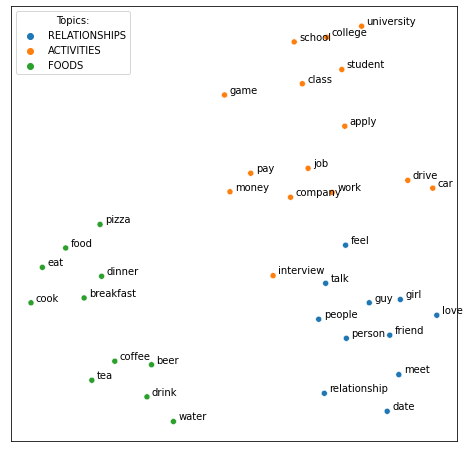

In [22]:
# Word embedding
embed_words = [word for x in target_topics.values() for word in x]
vectors_glove_twitter_200 = glove_twitter_200[embed_words]
        
# PCA
pca = manifold.TSNE(perplexity=10, n_components=2, init='pca')
vectors_glove_twitter_200 = pca.fit_transform(vectors_glove_twitter_200)

# Create dtf
vis_df = pd.DataFrame()
for k,v in target_topics.items():
    size = len(vis_df) + len(v)
    vis_df_group = pd.DataFrame(vectors_glove_twitter_200[len(vis_df):size], columns=["x","y"], index=v)
    vis_df_group["Topics:"] = k
    vis_df = vis_df.append(vis_df_group)
        
# Plotting
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=vis_df, x="x", y="y", hue="Topics:", ax=ax)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], yticks=[], yticklabels=[])

for i in range(len(vis_df)):
    ax.annotate(vis_df.index[i], xy=(vis_df["x"].iloc[i],vis_df["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points')

In [23]:
# Loading BERT tokenizer and pretrained model
bert_tokenizer = transformers.BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFBertModel: ['pre_classifier', 'distilbert', 'dropout_19', 'classifier']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identic

In [24]:
# BERT embedding func
def bert_embedding(txt, tokenizer, model):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]  
    embedding = model(idx)
    final_vectors = np.array(embedding[0][0][1:-1])
    return final_vectors

In [70]:
# BERT N x 768 matrix of vectors
vectors_bert = np.array([bert_embedding(txt, bert_tokenizer, bert_model).mean(0) for txt in newlist3])

In [71]:
# Saving/loading results
np.save('titles_vectors', vectors_bert)
#vectors_bert = np.load('titles_vectors.npy')

In [72]:
# Doing embedding on topics as well
embed_topics = {k:bert_embedding(v, bert_tokenizer, bert_model).mean(0) for k,v in target_topics.items()}

# Cosine similarities
predicted_prob = np.array([metrics.pairwise.cosine_similarity(vectors_bert, embed_topic.reshape(1, -1)).T.tolist()[0] for embed_topic in embed_topics.values()]).T

# List of topics
topics = list(embed_topics.keys())

# Classify the label with the highest cosine_similarity score
predicted = [topics[np.argmax(pred)] for pred in predicted_prob]

In [83]:
# Saving/loading results
np.save('predicted_topics.npy', predicted)
#predicted = np.load('predicted_topics.npy')

In [109]:
# Example of classified news
dtf['label'] = predicted
#pd.set_option('display.max_colwidth', None)
dtf.sample(5)

C:\Users\sorok\AppData\Local\Temp\ipykernel_14192\1218170768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['label'] = predicted


,clean,id,label
10169,anyone else hate reddits mobile app ive tried ...,362z53,RELATIONSHIPS
63931,birthday one care 37th birthday hospital time ...,j8rx9w,ACTIVITIES
45392,looking conversation help stave overnight bore...,9wnc4a,ACTIVITIES
19682,book reading currently im loving latest earnes...,45sn9a,ACTIVITIES
35624,whats best thing youve ever found thrift store...,7dvx52,ACTIVITIES


In [108]:
classified_posts = dtf[['id','label']]

In [110]:
classified_posts.to_csv('classified_posts.csv', index=False)